## Real Estate Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# %matplotlib inline

In [8]:
#For plotting histogram
#import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20,15))

## Train-Test Spliting

In [9]:
#For learning sklearn command
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set :{len(train_set)}\nRows in test set :{len(test_set)}" )

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set :{len(train_set)}\nRows is test set :{len(test_set)}" )

Rows in train set :404
Rows is test set :102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
#copied train_set into housing
housing = strat_train_set.copy()

## Looking for correlation

In [17]:
#Dependence of target with every variable (ranging from -1 to 1)
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

## Start plotting

In [18]:
from pandas.plotting import scatter_matrix
attr = ["MEDV","RM", "ZN", "LSTAT"]
scatter_matrix(housing[attr],figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0ED8EA90>,
      dtype=object)

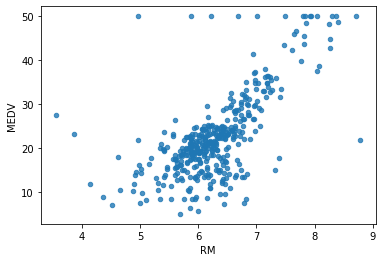

In [19]:
housing.plot(kind="scatter", x="RM" ,y="MEDV", alpha=0.8)

## Trying out Attribute combinations

In [20]:
#housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [21]:
# corr_matrix = housing.corr()
# corr_matrix['MEDV'].sort_values(ascending=False)

In [22]:
#housing.plot(kind="scatter", x="TAXRM" ,y="MEDV", alpha=0.8)

In [23]:
housing=strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attribute

## Scikit-learn Design

## Feauture Scaling

Two types of scaling
1. min-max scaling (Normalization)
    value-min/max-min 
    MinMaxScalar function
2. Standardization
    (value-mean)/std 
    StandardScalar

## Creating a pipeline

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scalar',StandardScaler())
])

In [25]:
housing_num = my_pipeline.fit_transform(housing)

In [26]:
housing_num

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a Desired Model

In [27]:
housing_num.shape

(404, 13)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num,housing_labels)

c:\users\basit\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Check with some data

In [29]:
some_data = housing.iloc[:5]

In [30]:
some_labels = housing_labels.iloc[:5]

In [31]:
prepared_data = my_pipeline.transform(some_data)

In [32]:
model.predict(prepared_data)

array([22.3 , 25.87, 15.76, 23.57, 23.89])

In [33]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [34]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num)
mse = mean_squared_error(housing_labels, housing_prediction)
rmse = np.sqrt(mse)

In [35]:
rmse

1.7155596898694463

## Using better evaluation - Cross Validation

In [36]:
# 1 2 3 4 5 6 7 8 9 10
# Leave 1 and calculate with 9 others and then check 1 and so with the rest
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [37]:
rmse_scores

array([2.70683237, 2.84662273, 4.6719978 , 2.83437092, 3.42012646,
       2.8499443 , 5.44567558, 3.30182298, 4.44882204, 3.71320111])

In [38]:
def print_scores(scores):
    print("Scores :", scores)
    print("Mean :", scores.mean())
    print("Standard Deviation :", scores.std())

In [39]:
print_scores(rmse_scores)

Scores : [2.70683237 2.84662273 4.6719978  2.83437092 3.42012646 2.8499443
 5.44567558 3.30182298 4.44882204 3.71320111]
Mean : 3.623941628379324
Standard Deviation : 0.889867413227276


## Saving The Model

In [40]:
from joblib import dump, load
dump(model, 'RealEstate.joblib')

['RealEstate.joblib']

## Testing the Model

In [41]:
X_test = housing
Y_test = housing_labels
X_test_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [42]:
final_rmse

1.7155596898694463

In [43]:
print(final_prediction, list(Y_test))

[22.3  25.87 15.76 23.57 23.89 16.8  24.77 24.58 10.14 31.52 16.46 18.56
 10.05 34.28 23.89 13.5  19.7  18.13  6.09 20.2  18.72 18.74 18.19 26.09
 23.8  25.17 13.41 21.02 15.03 27.68 14.44 18.71 10.67 12.3  19.2  25.98
 23.45 49.52 31.54 20.1  22.   34.9  37.75  8.95 20.56 11.47 21.99 33.09
 23.03  7.57 24.03 22.48 23.62 33.37 14.66 33.98 21.09 25.52 34.12 17.23
 20.86 19.47 28.18 21.09 14.02 30.23 50.   14.83 27.59 35.63 22.53 36.23
 23.62 10.57 20.61 28.73 25.65 15.61 16.17 18.41 30.99  8.08 19.1  18.88
 24.8  24.14 30.22 26.01 29.86 16.3  22.98 30.5  27.46 20.31 22.59 34.06
 31.38 19.84 22.63 16.78 12.02 46.84 20.3  42.62 20.28 16.04 19.61 21.16
 27.66 17.35 18.72  7.81 13.95 20.84 10.8  18.69 13.85 36.46 23.22 14.82
 22.69  8.77  9.04 19.26 24.15 15.88 18.51 23.85 11.86 21.24 23.13 14.44
 19.03 13.47 46.74 18.06 23.68 24.06 21.73 50.   14.36 21.4  27.79 19.49
 31.2  17.41 21.01 19.04 21.77  8.45 23.62 16.19 35.49 16.34 26.25 13.62
 18.32 19.07 24.18 18.1  23.13 24.62 28.3  19.53 48

In [44]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [45]:
from joblib import dump,load
import numpy as np
model = load('RealEstate.joblib')
features = np.array ([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.3])